# Exploratory Data Analysis

This notebook is meant for all EDA. Feel free to add or change sections.


Below is a temprorary list of TODOs that you can extend if you notice something you want to check later, but dont have time to do right now.

TODO:
- Graph out all time-values to see if there is an obious trend over time.
- Check for cyclical trends.
    - Do sine- and cos-transformations of hour/weekday/month respectively and look for patterns.
- Check for outliers.
    - Make scatterplots for the continous values and see what values are suspicous.
- If there are missing values, look for patterns that wxplain when data is usually missing.
    - Do weekends usually have missing data for example?
- Check for [class imbalances](https://www.geeksforgeeks.org/machine-learning/how-to-handle-imbalanced-classes-in-machine-learning/).
    - If some features have a much lower amount of data points than others, that leads to class imbalance.

## Setup

### Imports

In [6]:
import pandas as pd
from pathlib import Path
from tabulate import tabulate

### Helper Functions

In [12]:
def load_data(filename, folder="1_raw"):
    """
    Load data from a CSV file in a subfolder of the project's 'data' directory.
    This version is adjusted to work even if the notebook is run from a subfolder.

    Parameters
    ----------
    filename : str
        The name of the file to load, including the extension (e.g., "data.csv").
    folder : str, optional
        The subfolder within 'data' to load from. Defaults to "1_raw".
    """
    try:
        # Go up one level from the current working directory to find the project root
        PROJECT_ROOT = Path.cwd().parent

        file_path = PROJECT_ROOT / "data" / folder / filename

        df = pd.read_csv(file_path, sep=",")

        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None


def save_data(df, filename, folder="2_interim"):
    """
    Save a dataframe to a CSV file in a subfolder of the project's 'data' directory.

    This function automatically creates the destination folder if it doesn't exist.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to save.
    filename : str
        The name for the output file, including the extension (e.g., "processed_orders.csv").
    folder : str, optional
        The subfolder within 'data' to save to. Defaults to "2_interim".
    """
    try:
        PROJECT_ROOT = Path.cwd().parent
        save_dir = PROJECT_ROOT / "data" / folder
        save_dir.mkdir(parents=True, exist_ok=True)

        # The full filename, including extension, is now expected
        file_path = save_dir / filename

        df.to_csv(file_path, sep=",", index=False)

        print(f"Data saved successfully to {file_path} ✅")

    except Exception as e:
        print(f"An error occurred while saving the file: {e}")

### Data Loading

In [14]:
# Extended files
df_em = load_data("extended_materials.csv")
df_et = load_data("extended_transportation.csv")

# Kernel files
df_kpo = load_data("kernel_purchase_orders.csv")
df_kr = load_data("kernel_receivals.csv")

# Other files
df_pm = load_data("prediction_mapping.csv")
df_ss = load_data("sample_submission.csv")

datasets = {
    "extended_materials": df_em,
    "extended_transportation": df_et,
    "kernel_purchase_orders": df_kpo,
    "kernel_receivals": df_kr,
    "prediction_mapping": df_pm,
    "sample_submission": df_ss,
}

Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_materials.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_transportation.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_purchase_orders.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_receivals.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/prediction_mapping.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/sample_submission.csv


## Introductory EDA

### Checking .head(n=20) for all dataframes

In [15]:
df_em.head(n=20)

,rm_id,product_id,product_version,raw_material_alloy,raw_material_format_type,stock_location
0,NaN,NaN,NaN,NaN,NaN,NaN
1,342.0,91900170.0,1.0,SB06 Traders,24.0,DELETED_28.02:2011_SB06 anodiz
2,343.0,91900143.0,2.0,SB02 606035,24.0,SB 02
3,345.0,91900143.0,2.0,SA10 606035,3.0,DELETED_28.02:2011_ST01
4,346.0,91900146.0,2.0,SA15 600540,3.0,DELETED_28.02:2011_SA 300370
5,347.0,91900143.0,2.0,SA13 606020,3.0,DELETED_28.02:2011_SA13 6035
6,348.0,91900143.0,2.0,SA11 606035,3.0,DELETED_28.02:2011_ST01
7,353.0,91900143.0,1.0,TYB 6060,23.0,DELETED_28.02:2011_TYB
8,354.0,91900182.0,1.0,SA99.5,21.0,DELETED_10.09:2015_SA 99.5
9,355.0,91900152.0,14.0,"PM99,7 Coils",7.0,DELETED_21.06:2019_Bobinas Primario


In [16]:
df_em.describe(include="all")

,rm_id,product_id,product_version,raw_material_alloy,raw_material_format_type,stock_location
count,1217.000000,1.217000e+03,1217.000000,1217,1217.000000,1217
unique,NaN,NaN,NaN,180,NaN,153
top,NaN,NaN,NaN,CPS Prof 6060,NaN,SB 16
freq,NaN,NaN,NaN,55,NaN,43
mean,2546.416598,8.351876e+07,16.420707,NaN,32.516845,NaN
std,783.283365,2.646914e+07,13.187869,NaN,13.172436,NaN
min,342.000000,1.002000e+03,1.000000,NaN,1.000000,NaN
25%,2133.000000,9.190015e+07,5.000000,NaN,24.000000,NaN
50%,2160.000000,9.190030e+07,13.000000,NaN,36.000000,NaN
75%,3125.000000,9.190144e+07,25.000000,NaN,47.000000,NaN


In [ ]:
df_et.head(n=20)

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,transporter_name,vehicle_no,unit_status,vehicle_start_weight,...,net_weight,wood,ironbands,plastic,water,ice,other,chips,packaging,cardboard
0,365.0,91900143.0,208545.0,10.0,1,NaN,Transporter0,Vehicle0,Transferred,40040.0,...,11420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,365.0,91900143.0,208545.0,10.0,2,NaN,Transporter0,Vehicle0,Transferred,40040.0,...,13760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,365.0,91900143.0,208490.0,10.0,1,NaN,Transporter1,Vehicle1,Transferred,39940.0,...,11281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,365.0,91900143.0,208490.0,10.0,2,NaN,Transporter1,Vehicle1,Transferred,39940.0,...,13083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,379.0,91900296.0,210435.0,20.0,1,NaN,Transporter2,Vehicle2,Transferred,39360.0,...,23910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,389.0,91900330.0,208535.0,30.0,1,NaN,Transporter3,Vehicle3,Transferred,22600.0,...,8680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,365.0,91900143.0,208532.0,10.0,1,NaN,Transporter1,Vehicle4,Transferred,39080.0,...,14840.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,369.0,91900146.0,208532.0,30.0,2,NaN,Transporter1,Vehicle4,Transferred,39080.0,...,6745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,366.0,91900160.0,208532.0,20.0,3,NaN,Transporter1,Vehicle4,Transferred,39080.0,...,3015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,365.0,91900143.0,208537.0,10.0,1,NaN,Transporter4,Vehicle5,Transferred,40500.0,...,25060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_kpo.head(n=20)

,purchase_order_id,purchase_order_item_no,quantity,delivery_date,product_id,product_version,created_date_time,modified_date_time,unit_id,unit,status_id,status
0,1,1,-14.0,2003-05-12 00:00:00.0000000 +02:00,91900143,1,2003-05-12 10:00:48.0000000 +00:00,2004-06-15 06:16:18.0000000 +00:00,NaN,NaN,2,Closed
1,22,1,23880.0,2003-05-27 00:00:00.0000000 +02:00,91900160,1,2003-05-27 12:42:07.0000000 +00:00,2012-06-29 09:41:13.0000000 +00:00,NaN,NaN,2,Closed
2,41,1,0.0,2004-03-08 00:00:00.0000000 +01:00,91900143,1,2004-03-08 13:44:31.0000000 +00:00,2012-07-04 13:51:02.0000000 +00:00,NaN,NaN,2,Closed
3,61,1,0.0,2004-03-10 00:00:00.0000000 +01:00,91900143,1,2004-03-10 11:39:06.0000000 +00:00,2012-07-04 13:50:59.0000000 +00:00,NaN,NaN,2,Closed
4,141,10,25000.0,2004-10-28 00:00:00.0000000 +02:00,91900143,1,2004-10-22 12:21:54.0000000 +00:00,2012-07-04 13:50:55.0000000 +00:00,NaN,NaN,2,Closed
5,161,10,6000.0,2005-03-11 00:00:00.0000000 +01:00,91900143,1,2005-03-11 13:53:25.0000000 +00:00,2012-07-04 13:50:49.0000000 +00:00,NaN,NaN,2,Closed
6,161,20,15000.0,2006-03-27 00:00:00.0000000 +02:00,91900143,1,2006-03-27 11:04:44.0000000 +00:00,2012-07-04 13:50:52.0000000 +00:00,NaN,NaN,2,Closed
7,361,10,150000.0,2012-07-31 00:00:00.0000000 +02:00,91900296,1,2012-07-04 13:53:29.0000000 +00:00,2014-07-29 10:58:02.0000000 +00:00,NaN,NaN,2,Closed
8,361,20,150000.0,2012-07-31 00:00:00.0000000 +02:00,91900170,1,2012-07-04 13:55:14.0000000 +00:00,2014-07-29 10:58:03.0000000 +00:00,NaN,NaN,2,Closed
9,361,30,150000.0,2012-07-31 00:00:00.0000000 +02:00,91901050,1,2012-07-09 07:52:43.0000000 +00:00,2014-07-29 10:58:05.0000000 +00:00,NaN,NaN,2,Closed


In [18]:
df_kr.head(n=20)

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,date_arrival,receival_status,net_weight,supplier_id
0,365.0,91900143.0,208545.0,10.0,1,NaN,2004-06-15 13:34:00 +02:00,Completed,11420.0,52062
1,365.0,91900143.0,208545.0,10.0,2,NaN,2004-06-15 13:34:00 +02:00,Completed,13760.0,52062
2,365.0,91900143.0,208490.0,10.0,1,NaN,2004-06-15 13:38:00 +02:00,Completed,11281.0,50468
3,365.0,91900143.0,208490.0,10.0,2,NaN,2004-06-15 13:38:00 +02:00,Completed,13083.0,50468
4,379.0,91900296.0,210435.0,20.0,1,NaN,2004-06-15 13:40:00 +02:00,Completed,23910.0,52577
5,389.0,91900330.0,208535.0,30.0,1,NaN,2004-06-15 13:43:00 +02:00,Completed,8680.0,55251
6,365.0,91900143.0,208532.0,10.0,1,NaN,2004-06-15 13:46:00 +02:00,Completed,14840.0,20023
7,369.0,91900146.0,208532.0,30.0,2,NaN,2004-06-15 13:46:00 +02:00,Completed,6745.0,20023
8,366.0,91900160.0,208532.0,20.0,3,NaN,2004-06-15 13:46:00 +02:00,Completed,3015.0,20023
9,365.0,91900143.0,208537.0,10.0,1,NaN,2004-06-16 08:26:00 +02:00,Completed,25060.0,50387


In [19]:
df_pm.head(n=20)

,ID,rm_id,forecast_start_date,forecast_end_date
0,1,365,2025-01-01,2025-01-02
1,2,365,2025-01-01,2025-01-03
2,3,365,2025-01-01,2025-01-04
3,4,365,2025-01-01,2025-01-05
4,5,365,2025-01-01,2025-01-06
5,6,365,2025-01-01,2025-01-07
6,7,365,2025-01-01,2025-01-08
7,8,365,2025-01-01,2025-01-09
8,9,365,2025-01-01,2025-01-10
9,10,365,2025-01-01,2025-01-11


In [20]:
df_ss.head(n=20)

,ID,predicted_weight
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [21]:
# --- Full Table ---
all_features = sorted(
    list(set(feature for df in datasets.values() for feature in df.columns))
)
presence_data = []

for name, df in datasets.items():
    row = {}
    for feature in all_features:
        if feature in df.columns:
            series = df[feature]
            total_count = len(series)

            if total_count > 0:
                non_nan_count = series.count()
                fill_grade = (non_nan_count / total_count) * 100
                row[feature] = f"✅ {fill_grade:.1f}%"
            else:
                row[feature] = "✅ 100.0%"
        else:
            row[feature] = ""
    presence_data.append(row)

presence_df = pd.DataFrame(presence_data, index=datasets.keys())
presence_df_transposed = presence_df.T
presence_df_transposed.index.name = "Feature Name"
presence_df_transposed.columns.name = "DataFrame Name"

print("--- Feature Presence & Fill Grade Across All DataFrames ---")
print(
    tabulate(presence_df_transposed, headers="keys", tablefmt="grid", stralign="center")
)
print("\n" * 2)  # Add some space between the tables


# --- Kernel Table ---

# 1. Filter the datasets dictionary
kernel_datasets = {
    "kernel_purchase_orders": datasets["kernel_purchase_orders"],
    "kernel_receivals": datasets["kernel_receivals"],
}

# 2. Re-run the table generation logic on the filtered dictionary
kernel_features = sorted(
    list(set(feature for df in kernel_datasets.values() for feature in df.columns))
)
kernel_presence_data = []

for name, df in kernel_datasets.items():
    row = {}
    for feature in kernel_features:
        if feature in df.columns:
            series = df[feature]
            total_count = len(series)

            if total_count > 0:
                non_nan_count = series.count()
                fill_grade = (non_nan_count / total_count) * 100
                row[feature] = f"✅ {fill_grade:.1f}%"
            else:
                row[feature] = "✅ 100.0%"
        else:
            row[feature] = ""
    kernel_presence_data.append(row)

kernel_presence_df = pd.DataFrame(kernel_presence_data, index=kernel_datasets.keys())
kernel_presence_df_transposed = kernel_presence_df.T
kernel_presence_df_transposed.index.name = "Feature Name"
kernel_presence_df_transposed.columns.name = "DataFrame Name"


print("--- Feature Presence & Fill Grade for Kernel DataFrames ---")
print(
    tabulate(
        kernel_presence_df_transposed,
        headers="keys",
        tablefmt="grid",
        stralign="center",
    )
)

--- Feature Presence & Fill Grade Across All DataFrames ---
+--------------------------+----------------------+---------------------------+--------------------------+--------------------+----------------------+---------------------+
|       Feature Name       |  extended_materials  |  extended_transportation  |  kernel_purchase_orders  |  kernel_receivals  |  prediction_mapping  |  sample_submission  |
+==========================+======================+===========================+==========================+====================+======================+=====================+
|            ID            |                      |                           |                          |                    |      ✅ 100.0%       |      ✅ 100.0%      |
+--------------------------+----------------------+---------------------------+--------------------------+--------------------+----------------------+---------------------+
|         batch_id         |                      |         ✅ 52.8%          

In [22]:
# Exploratory Data Analysis - Raw Material Deliveries

## Setup
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from scipy import stats
import os
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Data Loading Functions
def load_data(filename, folder="1_raw"):
    """
    Load data from a CSV file in a subfolder of the project's 'data' directory.
    This version is adjusted to work even if the notebook is run from a subfolder.

    Parameters
    ----------
    filename : str
        The name of the file to load, including the extension (e.g., "data.csv").
    folder : str, optional
        The subfolder within 'data' to load from. Defaults to "1_raw".
    """
    try:
        # Go up one level from the current working directory to find the project root
        PROJECT_ROOT = Path.cwd().parent

        file_path = PROJECT_ROOT / "data" / folder / filename

        df = pd.read_csv(file_path, sep=",")

        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

### Load all datasets
print("Loading datasets...")
receivals = load_data('kernel_receivals.csv', 'kernel')
purchase_orders = load_data('kernel_purchase_orders.csv', 'kernel')
prediction_mapping = load_data('prediction_mapping.csv')
sample_submission = load_data('sample_submission.csv')
materials = load_data('extended_materials.csv', 'extended')
transportation = load_data('extended_transportation.csv', 'extended')

## 1. Basic Data Overview

def basic_overview(df, name):
    """Generate basic overview of a dataframe."""
    print(f"\n{'='*50}")
    print(f"Dataset: {name}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"\nColumn Types:")
    print(df.dtypes)
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
    print(missing_df[missing_df['Missing Count'] > 0])
    print(f"\nFirst 5 rows:")
    print(df.head())
    
# Run basic overview for all datasets
basic_overview(receivals, "Receivals")
basic_overview(purchase_orders, "Purchase Orders")
basic_overview(materials, "Materials")

## 2. Temporal Analysis

# Convert date columns
receivals['date_arrival'] = pd.to_datetime(receivals['date_arrival'], utc=True).dt.tz_localize(None)
purchase_orders['delivery_date'] = pd.to_datetime(purchase_orders['delivery_date'], errors='coerce')
prediction_mapping['forecast_start_date'] = pd.to_datetime(prediction_mapping['forecast_start_date'])
prediction_mapping['forecast_end_date'] = pd.to_datetime(prediction_mapping['forecast_end_date'])

# Time range analysis
print("\n=== Temporal Coverage ===")
print(f"Receivals date range: {receivals['date_arrival'].min()} to {receivals['date_arrival'].max()}")
print(f"Days covered: {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days}")

# Create time-based features
receivals['year'] = receivals['date_arrival'].dt.year
receivals['month'] = receivals['date_arrival'].dt.month
receivals['day_of_week'] = receivals['date_arrival'].dt.dayofweek
receivals['week_of_year'] = receivals['date_arrival'].dt.isocalendar().week
receivals['quarter'] = receivals['date_arrival'].dt.quarter

# Visualize temporal patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Yearly trend
yearly_weight = receivals.groupby('year')['net_weight'].agg(['sum', 'count', 'mean'])
axes[0, 0].plot(yearly_weight.index, yearly_weight['sum']/1e6, marker='o')
axes[0, 0].set_title('Total Weight by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Weight (Million kg)')
axes[0, 0].grid(True)

# 2. Monthly seasonality
monthly_weight = receivals.groupby('month')['net_weight'].mean()
axes[0, 1].bar(monthly_weight.index, monthly_weight.values)
axes[0, 1].set_title('Average Weight by Month (Seasonality Check)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Weight (kg)')
axes[0, 1].set_xticks(range(1, 13))

# 3. Day of week pattern
dow_weight = receivals.groupby('day_of_week')['net_weight'].agg(['sum', 'count'])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1, 0].bar(range(7), dow_weight['count'].values)
axes[1, 0].set_title('Deliveries by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Deliveries')
axes[1, 0].set_xticklabels(days)

# 4. Weekly pattern over the year
weekly_weight = receivals.groupby('week_of_year')['net_weight'].sum()
axes[1, 1].plot(weekly_weight.index, weekly_weight.values)
axes[1, 1].set_title('Weight by Week of Year')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Weight (kg)')

# 5. Quarterly trend
quarterly_weight = receivals.groupby(['year', 'quarter'])['net_weight'].sum().reset_index()
pivot_quarterly = quarterly_weight.pivot(index='quarter', columns='year', values='net_weight')
pivot_quarterly.plot(ax=axes[2, 0], marker='o')
axes[2, 0].set_title('Quarterly Patterns by Year')
axes[2, 0].set_xlabel('Quarter')
axes[2, 0].set_ylabel('Total Weight (kg)')
axes[2, 0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Recent activity
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=180)
recent_daily = receivals[receivals['date_arrival'] > recent_cutoff].groupby(
    receivals['date_arrival'].dt.date)['net_weight'].sum()
axes[2, 1].plot(recent_daily.index, recent_daily.values)
axes[2, 1].set_title('Last 6 Months Daily Deliveries')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Daily Weight (kg)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Material Analysis

# Analyze material characteristics
print("\n=== Material Analysis ===")
print(f"Unique raw materials (rm_id): {receivals['rm_id'].nunique()}")
print(f"Unique products: {receivals['product_id'].nunique()}")
print(f"Unique suppliers: {receivals['supplier_id'].nunique()}")

# Material frequency and volume
material_stats = receivals.groupby('rm_id').agg({
    'net_weight': ['sum', 'mean', 'std', 'count'],
    'date_arrival': ['min', 'max']
}).round(2)
material_stats.columns = ['_'.join(col).strip() for col in material_stats.columns]
material_stats['days_active'] = (
    material_stats['date_arrival_max'] - material_stats['date_arrival_min']
).dt.days
material_stats = material_stats.sort_values('net_weight_sum', ascending=False)

print("\nTop 10 Materials by Total Weight:")
print(material_stats.head(10)[['net_weight_sum', 'net_weight_count', 'days_active']])

# Visualize material distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pareto chart of materials
top_30_materials = material_stats.head(30)
cumulative_pct = 100 * top_30_materials['net_weight_sum'].cumsum() / material_stats['net_weight_sum'].sum()
ax1 = axes[0, 0]
ax1.bar(range(len(top_30_materials)), top_30_materials['net_weight_sum'].values/1e6, color='b')
ax1.set_ylabel('Total Weight (Million kg)', color='b')
ax1.set_xlabel('Material Rank')
ax1.set_title('Top 30 Materials - Pareto Analysis')
ax2 = ax1.twinx()
ax2.plot(range(len(top_30_materials)), cumulative_pct.values, 'r-', marker='o')
ax2.set_ylabel('Cumulative %', color='r')
ax2.axhline(y=80, color='r', linestyle='--', alpha=0.5)

# 2. Delivery frequency distribution
axes[0, 1].hist(material_stats['net_weight_count'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of Delivery Counts per Material')
axes[0, 1].set_xlabel('Number of Deliveries')
axes[0, 1].set_ylabel('Number of Materials')
axes[0, 1].set_yscale('log')

# 3. Weight variability (CV)
material_stats['cv'] = material_stats['net_weight_std'] / material_stats['net_weight_mean']
axes[1, 0].scatter(material_stats['net_weight_count'], material_stats['cv'], alpha=0.5)
axes[1, 0].set_title('Delivery Consistency (CV) vs Frequency')
axes[1, 0].set_xlabel('Number of Deliveries')
axes[1, 0].set_ylabel('Coefficient of Variation')
axes[1, 0].set_xlim(0, 1000)
axes[1, 0].set_ylim(0, 3)

# 4. Active period distribution
axes[1, 1].hist(material_stats['days_active']/365, bins=30, edgecolor='black')
axes[1, 1].set_title('Material Active Period Distribution')
axes[1, 1].set_xlabel('Years Active')
axes[1, 1].set_ylabel('Number of Materials')

plt.tight_layout()
plt.show()

## 4. Purchase Order Analysis

# Merge purchase orders with receivals
po_receival = pd.merge(
    receivals,
    purchase_orders,
    on=['purchase_order_id', 'purchase_order_item_no'],
    how='left',
    suffixes=('', '_po')
)

# Calculate lead times
po_receival['lead_time'] = (po_receival['date_arrival'] - po_receival['delivery_date']).dt.days

print("\n=== Purchase Order Analysis ===")
print(f"Lead Time Statistics (days):")
print(po_receival['lead_time'].describe())

# Negative lead time means early delivery
early_deliveries = (po_receival['lead_time'] < 0).sum()
print(f"\nEarly deliveries: {early_deliveries} ({100*early_deliveries/len(po_receival):.1f}%)")

# Visualize lead time distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Lead time histogram
axes[0].hist(po_receival['lead_time'].dropna(), bins=100, range=(-100, 100), edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--', label='On-time')
axes[0].set_title('Lead Time Distribution')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 2. Lead time by material
lead_by_material = po_receival.groupby('rm_id')['lead_time'].mean().sort_values()
top_materials = material_stats.head(20).index
lead_top = lead_by_material[lead_by_material.index.isin(top_materials)]
axes[1].barh(range(len(lead_top)), lead_top.values)
axes[1].set_title('Average Lead Time - Top Materials')
axes[1].set_xlabel('Average Lead Time (days)')
axes[1].set_ylabel('Material Rank')
axes[1].axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## 5. Statistical Tests and Outlier Detection

# Outlier detection for net_weight
Q1 = receivals['net_weight'].quantile(0.25)
Q3 = receivals['net_weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = receivals[(receivals['net_weight'] < lower_bound) | (receivals['net_weight'] > upper_bound)]
print(f"\n=== Outlier Analysis ===")
print(f"Weight outliers detected: {len(outliers)} ({100*len(outliers)/len(receivals):.2f}%)")
print(f"Outlier weight range: {outliers['net_weight'].min():.2f} to {outliers['net_weight'].max():.2f}")

# Test for seasonality
print("\n=== Statistical Tests ===")
# ANOVA test for monthly differences
monthly_groups = [group['net_weight'].values for name, group in receivals.groupby('month')]
f_stat, p_value = stats.f_oneway(*monthly_groups)
print(f"Monthly seasonality test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant monthly seasonality detected")
else:
    print("  → No significant monthly seasonality")

# Test for weekly patterns
weekly_groups = [group['net_weight'].values for name, group in receivals.groupby('day_of_week')]
f_stat, p_value = stats.f_oneway(*weekly_groups)
print(f"Day-of-week test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant day-of-week patterns detected")

## 6. Key Insights Summary

print("\n" + "="*60)
print("KEY INSIGHTS FOR MODELING")
print("="*60)

# Calculate key metrics
recent_months = 3
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=recent_months*30)
recent_activity = receivals[receivals['date_arrival'] > recent_cutoff]

print(f"\n1. DATA COVERAGE:")
print(f"   - Historical data spans {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days/365:.1f} years")
print(f"   - {receivals['rm_id'].nunique()} unique materials")
print(f"   - {len(receivals):,} total deliveries")

print(f"\n2. RECENT ACTIVITY (last {recent_months} months):")
print(f"   - Active materials: {recent_activity['rm_id'].nunique()}")
print(f"   - Total deliveries: {len(recent_activity):,}")
print(f"   - Average daily weight: {recent_activity.groupby(recent_activity['date_arrival'].dt.date)['net_weight'].sum().mean():,.0f} kg")

print(f"\n3. MATERIAL CONCENTRATION:")
top_10_pct = 100 * material_stats.head(10)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
top_20_pct = 100 * material_stats.head(20)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
print(f"   - Top 10 materials: {top_10_pct:.1f}% of total weight")
print(f"   - Top 20 materials: {top_20_pct:.1f}% of total weight")

print(f"\n4. DELIVERY PATTERNS:")
print(f"   - Materials with >100 deliveries: {(material_stats['net_weight_count'] > 100).sum()}")
print(f"   - Average deliveries per material: {material_stats['net_weight_count'].mean():.1f}")
print(f"   - Median lead time: {po_receival['lead_time'].median():.0f} days")
print(f"   - Early delivery rate: {100*(po_receival['lead_time'] < 0).sum()/len(po_receival):.1f}%")

print(f"\n5. PREDICTION CHALLENGES:")
print(f"   - Materials to predict: {prediction_mapping['rm_id'].nunique()}")
print(f"   - Forecast horizon: {prediction_mapping['forecast_start_date'].min()} to {prediction_mapping['forecast_end_date'].max()}")
print(f"   - Total predictions needed: {len(prediction_mapping):,}")

# Materials not seen recently
inactive_materials = set(material_stats.index) - set(recent_activity['rm_id'].unique())
print(f"   - Materials inactive in last {recent_months} months: {len(inactive_materials)}")

print("\n" + "="*60)

Loading datasets...
Error: The file was not found at /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/kernel/kernel_receivals.csv
Error: The file was not found at /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/kernel/kernel_purchase_orders.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/prediction_mapping.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/sample_submission.csv
Error: The file was not found at /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/extended/extended_materials.csv
Error: The file was not found at /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/extende

AttributeError: 'NoneType' object has no attribute 'shape'

Loading datasets...
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_materials.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_transportation.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_purchase_orders.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_receivals.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/prediction_mapping.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/sample_submi

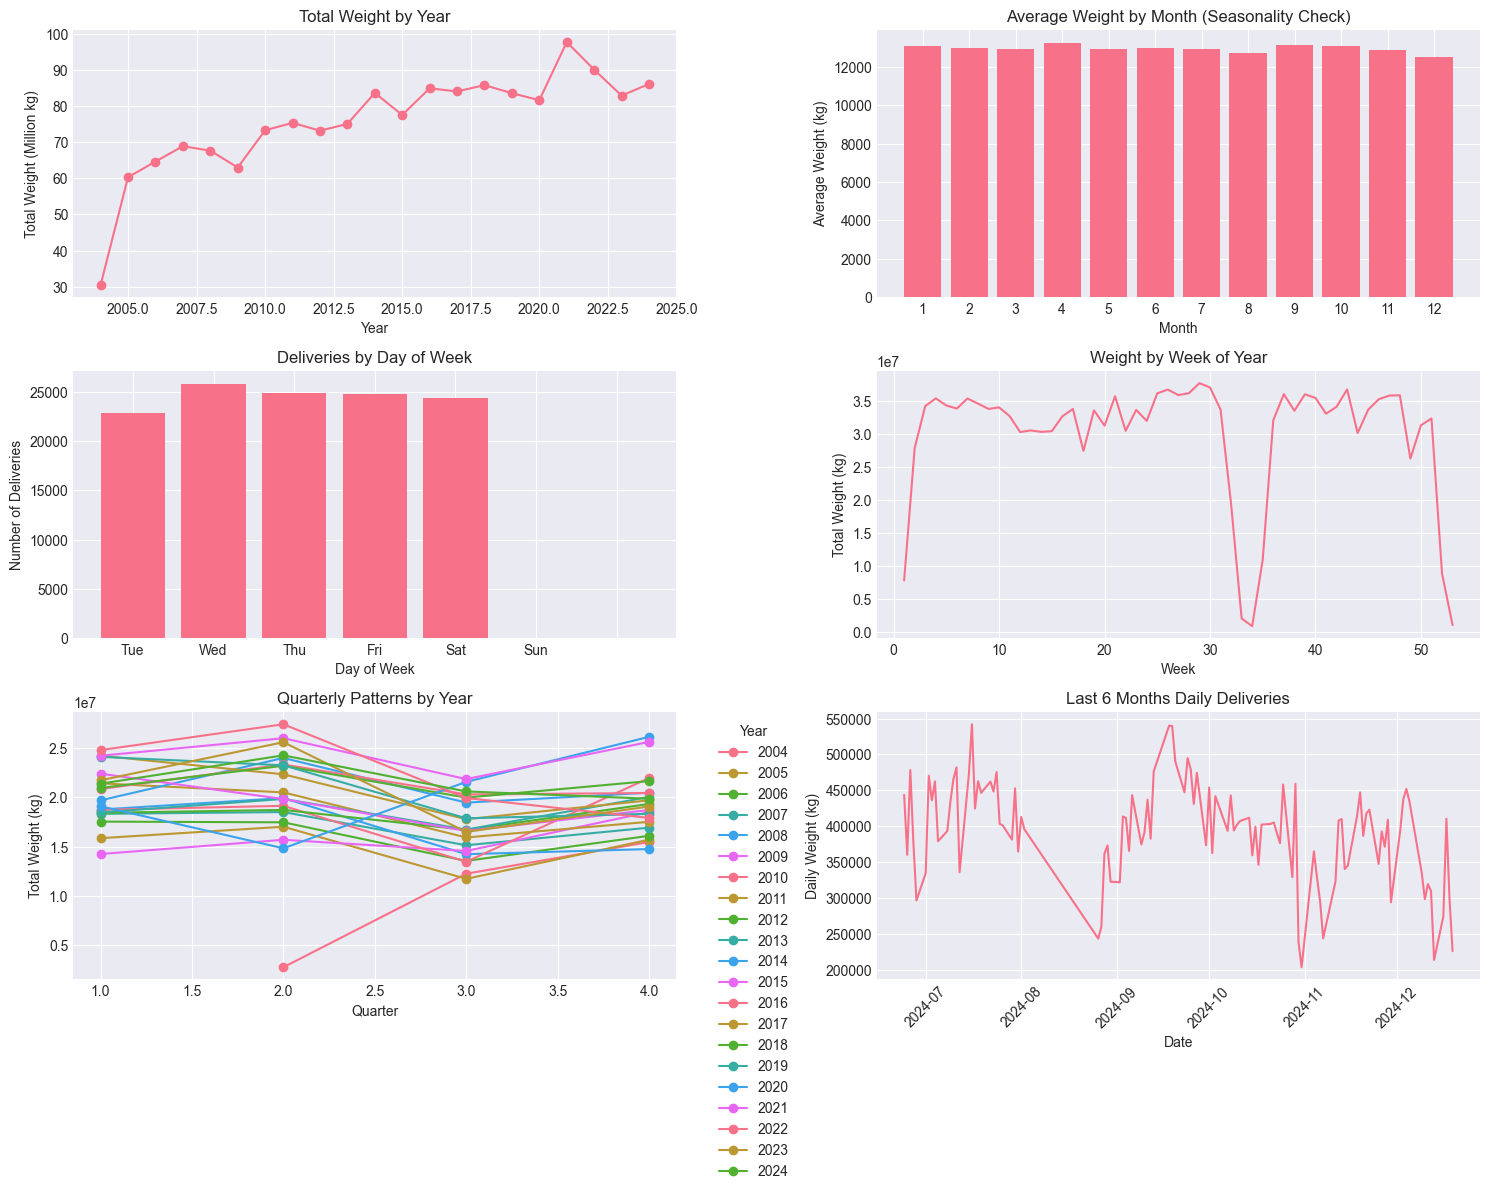


=== Material Analysis ===
Unique raw materials (rm_id): 203
Unique products: 54
Unique suppliers: 255

Top 10 Materials by Total Weight:
        net_weight_sum  net_weight_count  days_active
rm_id                                                
2130.0     351244347.0             23620         4782
1903.0     270574744.0             19337         2401
2160.0     161712550.0             13507         3881
2140.0     132512874.0              5343         4676
1909.0      66634224.0              2697         2399
1906.0      44043967.0              3112         2399
3126.0      38273200.0              2059         1552
2182.0      37282921.0              3370         1665
3781.0      26317536.0              1521          654
365.0       25616003.0              1722          288


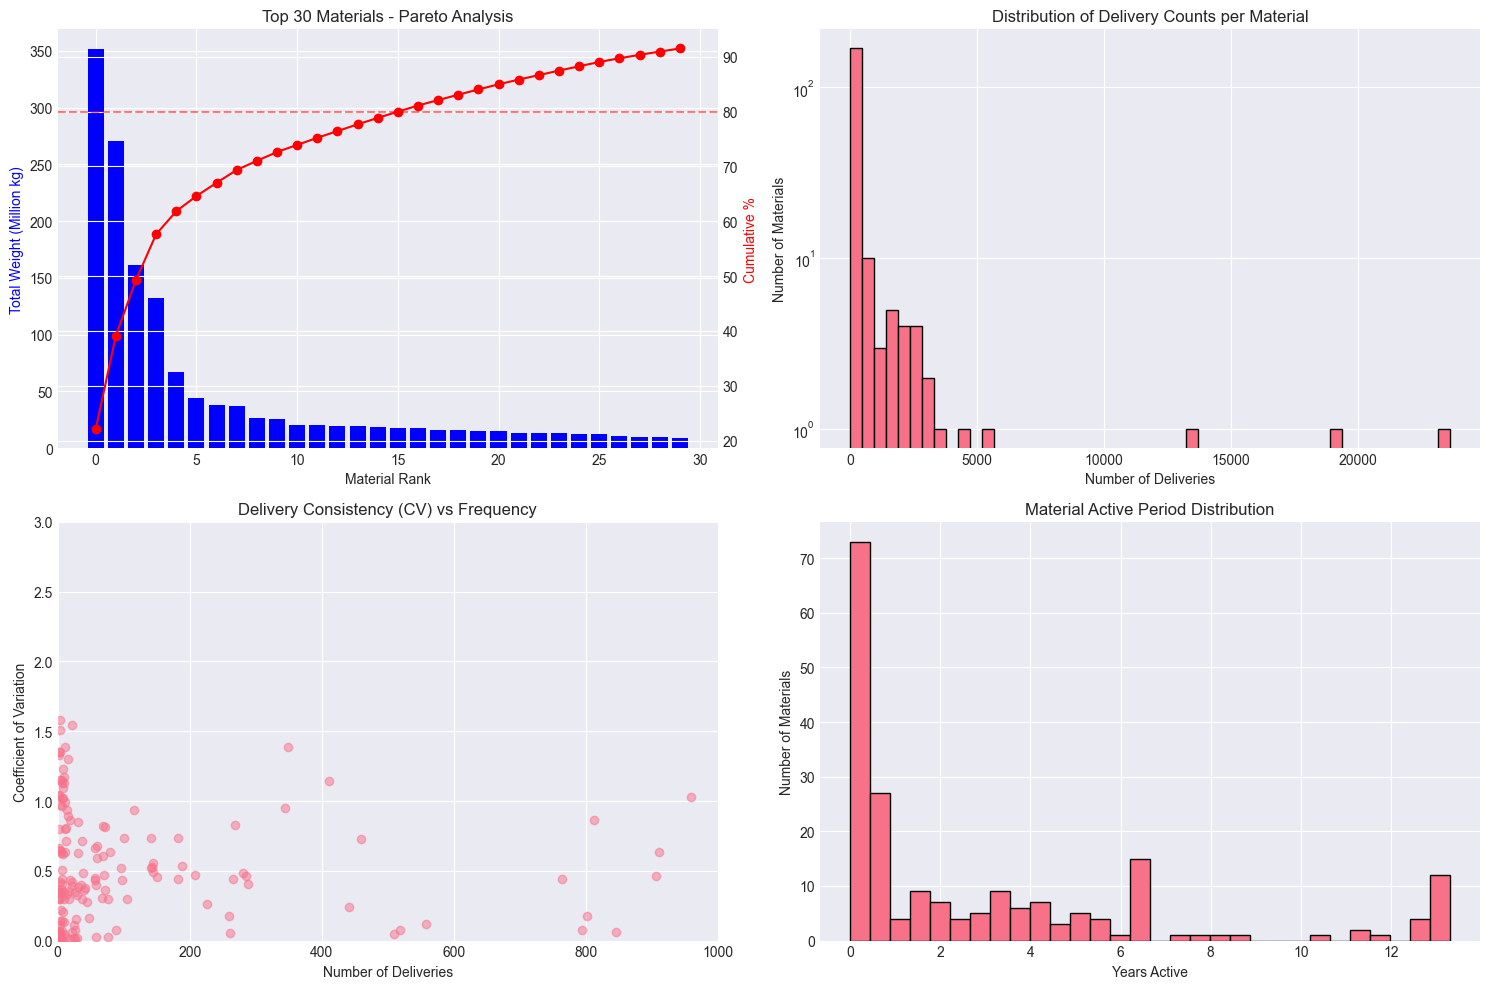

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

In [23]:
# Exploratory Data Analysis - Raw Material Deliveries

## Setup
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from scipy import stats
from pathlib import Path
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Data Loading Functions
def load_data(filename, folder="1_raw"):
    """
    Load data from a CSV file in a subfolder of the project's 'data' directory.
    This version is adjusted to work even if the notebook is run from a subfolder.
    
    Parameters
    ----------
    filename : str
        The name of the file to load, including the extension (e.g., "data.csv").
    folder : str, optional
        The subfolder within 'data' to load from. Defaults to "1_raw".
    """
    try:
        # Go up one level from the current working directory to find the project root
        PROJECT_ROOT = Path.cwd().parent
        
        file_path = PROJECT_ROOT / "data" / folder / filename
        
        df = pd.read_csv(file_path, sep=",")
        
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

### Load all datasets
print("Loading datasets...")

# Extended files
df_em = load_data("extended_materials.csv")
df_et = load_data("extended_transportation.csv")

# Kernel files
df_kpo = load_data("kernel_purchase_orders.csv")
df_kr = load_data("kernel_receivals.csv")

# Other files
df_pm = load_data("prediction_mapping.csv")
df_ss = load_data("sample_submission.csv")

datasets = {
    "extended_materials": df_em,
    "extended_transportation": df_et,
    "kernel_purchase_orders": df_kpo,
    "kernel_receivals": df_kr,
    "prediction_mapping": df_pm,
    "sample_submission": df_ss,
}

# Create shorter aliases for easier use
receivals = df_kr
purchase_orders = df_kpo
prediction_mapping = df_pm
sample_submission = df_ss
materials = df_em
transportation = df_et

## 1. Basic Data Overview

def basic_overview(df, name):
    """Generate basic overview of a dataframe."""
    print(f"\n{'='*50}")
    print(f"Dataset: {name}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"\nColumn Types:")
    print(df.dtypes)
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
    print(missing_df[missing_df['Missing Count'] > 0])
    print(f"\nFirst 5 rows:")
    print(df.head())
    
# Run basic overview for all datasets
basic_overview(receivals, "Receivals")
basic_overview(purchase_orders, "Purchase Orders")
basic_overview(materials, "Materials")

## 2. Temporal Analysis

# Convert date columns
receivals['date_arrival'] = pd.to_datetime(receivals['date_arrival'], utc=True).dt.tz_localize(None)
purchase_orders['delivery_date'] = pd.to_datetime(purchase_orders['delivery_date'], errors='coerce')
prediction_mapping['forecast_start_date'] = pd.to_datetime(prediction_mapping['forecast_start_date'])
prediction_mapping['forecast_end_date'] = pd.to_datetime(prediction_mapping['forecast_end_date'])

# Time range analysis
print("\n=== Temporal Coverage ===")
print(f"Receivals date range: {receivals['date_arrival'].min()} to {receivals['date_arrival'].max()}")
print(f"Days covered: {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days}")

# Create time-based features
receivals['year'] = receivals['date_arrival'].dt.year
receivals['month'] = receivals['date_arrival'].dt.month
receivals['day_of_week'] = receivals['date_arrival'].dt.dayofweek
receivals['week_of_year'] = receivals['date_arrival'].dt.isocalendar().week
receivals['quarter'] = receivals['date_arrival'].dt.quarter

# Visualize temporal patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Yearly trend
yearly_weight = receivals.groupby('year')['net_weight'].agg(['sum', 'count', 'mean'])
axes[0, 0].plot(yearly_weight.index, yearly_weight['sum']/1e6, marker='o')
axes[0, 0].set_title('Total Weight by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Weight (Million kg)')
axes[0, 0].grid(True)

# 2. Monthly seasonality
monthly_weight = receivals.groupby('month')['net_weight'].mean()
axes[0, 1].bar(monthly_weight.index, monthly_weight.values)
axes[0, 1].set_title('Average Weight by Month (Seasonality Check)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Weight (kg)')
axes[0, 1].set_xticks(range(1, 13))

# 3. Day of week pattern
dow_weight = receivals.groupby('day_of_week')['net_weight'].agg(['sum', 'count'])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1, 0].bar(range(7), dow_weight['count'].values)
axes[1, 0].set_title('Deliveries by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Deliveries')
axes[1, 0].set_xticklabels(days)

# 4. Weekly pattern over the year
weekly_weight = receivals.groupby('week_of_year')['net_weight'].sum()
axes[1, 1].plot(weekly_weight.index, weekly_weight.values)
axes[1, 1].set_title('Weight by Week of Year')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Weight (kg)')

# 5. Quarterly trend
quarterly_weight = receivals.groupby(['year', 'quarter'])['net_weight'].sum().reset_index()
pivot_quarterly = quarterly_weight.pivot(index='quarter', columns='year', values='net_weight')
pivot_quarterly.plot(ax=axes[2, 0], marker='o')
axes[2, 0].set_title('Quarterly Patterns by Year')
axes[2, 0].set_xlabel('Quarter')
axes[2, 0].set_ylabel('Total Weight (kg)')
axes[2, 0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Recent activity
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=180)
recent_daily = receivals[receivals['date_arrival'] > recent_cutoff].groupby(
    receivals['date_arrival'].dt.date)['net_weight'].sum()
axes[2, 1].plot(recent_daily.index, recent_daily.values)
axes[2, 1].set_title('Last 6 Months Daily Deliveries')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Daily Weight (kg)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Material Analysis

# Analyze material characteristics
print("\n=== Material Analysis ===")
print(f"Unique raw materials (rm_id): {receivals['rm_id'].nunique()}")
print(f"Unique products: {receivals['product_id'].nunique()}")
print(f"Unique suppliers: {receivals['supplier_id'].nunique()}")

# Material frequency and volume
material_stats = receivals.groupby('rm_id').agg({
    'net_weight': ['sum', 'mean', 'std', 'count'],
    'date_arrival': ['min', 'max']
}).round(2)
material_stats.columns = ['_'.join(col).strip() for col in material_stats.columns]
material_stats['days_active'] = (
    material_stats['date_arrival_max'] - material_stats['date_arrival_min']
).dt.days
material_stats = material_stats.sort_values('net_weight_sum', ascending=False)

print("\nTop 10 Materials by Total Weight:")
print(material_stats.head(10)[['net_weight_sum', 'net_weight_count', 'days_active']])

# Visualize material distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pareto chart of materials
top_30_materials = material_stats.head(30)
cumulative_pct = 100 * top_30_materials['net_weight_sum'].cumsum() / material_stats['net_weight_sum'].sum()
ax1 = axes[0, 0]
ax1.bar(range(len(top_30_materials)), top_30_materials['net_weight_sum'].values/1e6, color='b')
ax1.set_ylabel('Total Weight (Million kg)', color='b')
ax1.set_xlabel('Material Rank')
ax1.set_title('Top 30 Materials - Pareto Analysis')
ax2 = ax1.twinx()
ax2.plot(range(len(top_30_materials)), cumulative_pct.values, 'r-', marker='o')
ax2.set_ylabel('Cumulative %', color='r')
ax2.axhline(y=80, color='r', linestyle='--', alpha=0.5)

# 2. Delivery frequency distribution
axes[0, 1].hist(material_stats['net_weight_count'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of Delivery Counts per Material')
axes[0, 1].set_xlabel('Number of Deliveries')
axes[0, 1].set_ylabel('Number of Materials')
axes[0, 1].set_yscale('log')

# 3. Weight variability (CV)
material_stats['cv'] = material_stats['net_weight_std'] / material_stats['net_weight_mean']
axes[1, 0].scatter(material_stats['net_weight_count'], material_stats['cv'], alpha=0.5)
axes[1, 0].set_title('Delivery Consistency (CV) vs Frequency')
axes[1, 0].set_xlabel('Number of Deliveries')
axes[1, 0].set_ylabel('Coefficient of Variation')
axes[1, 0].set_xlim(0, 1000)
axes[1, 0].set_ylim(0, 3)

# 4. Active period distribution
axes[1, 1].hist(material_stats['days_active']/365, bins=30, edgecolor='black')
axes[1, 1].set_title('Material Active Period Distribution')
axes[1, 1].set_xlabel('Years Active')
axes[1, 1].set_ylabel('Number of Materials')

plt.tight_layout()
plt.show()

## 4. Purchase Order Analysis

# Merge purchase orders with receivals
po_receival = pd.merge(
    receivals,
    purchase_orders,
    on=['purchase_order_id', 'purchase_order_item_no'],
    how='left',
    suffixes=('', '_po')
)

# Calculate lead times
po_receival['lead_time'] = (po_receival['date_arrival'] - po_receival['delivery_date']).dt.days

print("\n=== Purchase Order Analysis ===")
print(f"Lead Time Statistics (days):")
print(po_receival['lead_time'].describe())

# Negative lead time means early delivery
early_deliveries = (po_receival['lead_time'] < 0).sum()
print(f"\nEarly deliveries: {early_deliveries} ({100*early_deliveries/len(po_receival):.1f}%)")

# Visualize lead time distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Lead time histogram
axes[0].hist(po_receival['lead_time'].dropna(), bins=100, range=(-100, 100), edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--', label='On-time')
axes[0].set_title('Lead Time Distribution')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 2. Lead time by material
lead_by_material = po_receival.groupby('rm_id')['lead_time'].mean().sort_values()
top_materials = material_stats.head(20).index
lead_top = lead_by_material[lead_by_material.index.isin(top_materials)]
axes[1].barh(range(len(lead_top)), lead_top.values)
axes[1].set_title('Average Lead Time - Top Materials')
axes[1].set_xlabel('Average Lead Time (days)')
axes[1].set_ylabel('Material Rank')
axes[1].axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## 5. Statistical Tests and Outlier Detection

# Outlier detection for net_weight
Q1 = receivals['net_weight'].quantile(0.25)
Q3 = receivals['net_weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = receivals[(receivals['net_weight'] < lower_bound) | (receivals['net_weight'] > upper_bound)]
print(f"\n=== Outlier Analysis ===")
print(f"Weight outliers detected: {len(outliers)} ({100*len(outliers)/len(receivals):.2f}%)")
print(f"Outlier weight range: {outliers['net_weight'].min():.2f} to {outliers['net_weight'].max():.2f}")

# Test for seasonality
print("\n=== Statistical Tests ===")
# ANOVA test for monthly differences
monthly_groups = [group['net_weight'].values for name, group in receivals.groupby('month')]
f_stat, p_value = stats.f_oneway(*monthly_groups)
print(f"Monthly seasonality test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant monthly seasonality detected")
else:
    print("  → No significant monthly seasonality")

# Test for weekly patterns
weekly_groups = [group['net_weight'].values for name, group in receivals.groupby('day_of_week')]
f_stat, p_value = stats.f_oneway(*weekly_groups)
print(f"Day-of-week test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant day-of-week patterns detected")

## 6. Key Insights Summary

print("\n" + "="*60)
print("KEY INSIGHTS FOR MODELING")
print("="*60)

# Calculate key metrics
recent_months = 3
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=recent_months*30)
recent_activity = receivals[receivals['date_arrival'] > recent_cutoff]

print(f"\n1. DATA COVERAGE:")
print(f"   - Historical data spans {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days/365:.1f} years")
print(f"   - {receivals['rm_id'].nunique()} unique materials")
print(f"   - {len(receivals):,} total deliveries")

print(f"\n2. RECENT ACTIVITY (last {recent_months} months):")
print(f"   - Active materials: {recent_activity['rm_id'].nunique()}")
print(f"   - Total deliveries: {len(recent_activity):,}")
print(f"   - Average daily weight: {recent_activity.groupby(recent_activity['date_arrival'].dt.date)['net_weight'].sum().mean():,.0f} kg")

print(f"\n3. MATERIAL CONCENTRATION:")
top_10_pct = 100 * material_stats.head(10)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
top_20_pct = 100 * material_stats.head(20)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
print(f"   - Top 10 materials: {top_10_pct:.1f}% of total weight")
print(f"   - Top 20 materials: {top_20_pct:.1f}% of total weight")

print(f"\n4. DELIVERY PATTERNS:")
print(f"   - Materials with >100 deliveries: {(material_stats['net_weight_count'] > 100).sum()}")
print(f"   - Average deliveries per material: {material_stats['net_weight_count'].mean():.1f}")
print(f"   - Median lead time: {po_receival['lead_time'].median():.0f} days")
print(f"   - Early delivery rate: {100*(po_receival['lead_time'] < 0).sum()/len(po_receival):.1f}%")

print(f"\n5. PREDICTION CHALLENGES:")
print(f"   - Materials to predict: {prediction_mapping['rm_id'].nunique()}")
print(f"   - Forecast horizon: {prediction_mapping['forecast_start_date'].min()} to {prediction_mapping['forecast_end_date'].max()}")
print(f"   - Total predictions needed: {len(prediction_mapping):,}")

# Materials not seen recently
inactive_materials = set(material_stats.index) - set(recent_activity['rm_id'].unique())
print(f"   - Materials inactive in last {recent_months} months: {len(inactive_materials)}")

print("\n" + "="*60)

## 'Advice' regarding what to do next

Based on that table and the project requirements, here is a concrete, step-by-step plan for your EDA and data processing. Think of this as a roadmap for your `1_exploratory_data_analysis.ipynb` and `2_data_processing.ipynb` notebooks.

### 🗺️ Your Action Plan: From Raw Data to a Clean Foundation

Your goal is to transform the raw CSV files into a single, clean "master dataframe" that can be fed into your feature engineering functions.

---
### **Part 1: Targeted Exploratory Data Analysis (EDA)**
*(`1_exploratory_data_analysis.ipynb`)*

Your EDA shouldn't be a random search; it should be a targeted investigation to answer specific questions that will help you build features. Here’s what you're looking for:

#### **1. Understand the Target Variable (`net_weight`)**
First, get a feel for the delivery patterns.
* **Action:**
    1.  Load `kernel_receivals.csv`.
    2.  Convert `date_arrival` to a datetime object.
    3.  Aggregate the data to get the total daily `net_weight` for each `rm_id`.
* **What to look for (and visualize):**
    * **Sparsity:** Plot the daily deliveries for a few high-volume `rm_id`s. Do deliveries happen every day, or are they large but infrequent? This is critical. A model needs to handle many days with zero deliveries.
    * **Seasonality:** Are there weekly patterns (e.g., fewer deliveries on weekends)? Or monthly/quarterly patterns? A bar chart of total deliveries by month or day of the week can reveal this.
    * **Outliers:** Are there any negative `net_weight` values? Or values that are orders of magnitude larger than the rest? These could be data entry errors that need cleaning.


#### **2. Analyze the Link Between Orders and Receivals (Most Important)**
This is where your most powerful predictive signals are.
* **Action:**
    1.  Merge `kernel_receivals.csv` and `kernel_purchase_orders.csv`.
    2.  Calculate the **Delivery Delay**: `delay = actual_date_arrival - expected_delivery_date`. This is your single most important exploratory variable.
* **What to look for (and visualize):**
    * **Delay Distribution:** Plot a histogram of the `delay` in days. Is it normally distributed around zero? Is there a long tail of very late deliveries? The shape of this distribution tells you how reliable the `delivery_date` is.
    * **Segmented Delays:** Does the average delay change based on other categories? Create boxplots of the delay grouped by:
        * `supplier_id` (from `receivals`)
        * `transporter_name` (from `extended_transportation`)
        * `raw_material_format_type` (from `extended_materials`)
        If you find that "Supplier X" is consistently 5 days late, you've just discovered a hugely valuable feature.

---
### **Part 2: Data Cleaning and Processing**
*(`2_data_processing.ipynb`)*

Based on your EDA findings, you can now build a clean, unified dataset.

#### **1. Create the `master_df`**
* **Action:**
    1.  Start with `kernel_receivals`.
    2.  **Left join** `kernel_purchase_orders` using `purchase_order_id` and `purchase_order_item_no` as the composite key.
    3.  Optionally, left join `extended_materials` (on `rm_id`) and `extended_transportation` (on your composite key) to bring in useful features like `raw_material_format_type` and `transporter_name`.
    4.  **Ignore the sparse columns** from `transportation` (e.g., `wood`, `plastic`, `ice`). They won't be useful.

#### **2. Clean the Data**
* **Action:**
    * **Data Types:** Convert all date columns (`date_arrival`, `delivery_date`, `created_date_time`) to the `pd.to_datetime` format.
    * **Missing Values:** Your `net_weight` fill rate is 99.9%. The easiest and safest approach is to simply **drop the rows** where `net_weight` is missing. For `batch_id` (52.8% filled), treat the missing values as a special category (e.g., fill with "Unknown" or -1).
    * **Outliers:** Based on your EDA, remove any obvious errors (e.g., negative `net_weight`).
    * **Categorical Features:** For columns like `supplier_id`, `transporter_name`, etc., convert them to pandas' `category` dtype. This is more memory-efficient and LightGBM can handle it directly.

#### **3. Save the Processed Data**
* **Action:** Save your clean `master_df` to the `data/3_processed` directory as a Parquet or Feather file. This is much faster to load than a CSV and preserves your data types, so you don't have to repeat the cleaning steps every time you work on your model.

Once you have this clean `master_df`, you are perfectly set up to start implementing the `create_features` and `create_target` functions in your `lgbm_pipeline.py` script. Your data work will then directly feed your modeling pipeline.

Loading datasets...
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_materials.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/extended_transportation.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_purchase_orders.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/kernel_receivals.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/prediction_mapping.csv
Data loaded successfully from /Users/ulrikberge/Library/CloudStorage/OneDrive-NTNU/Maskinlæring prosjekt 2/tdt4173-course-project/data/1_raw/sample_submi

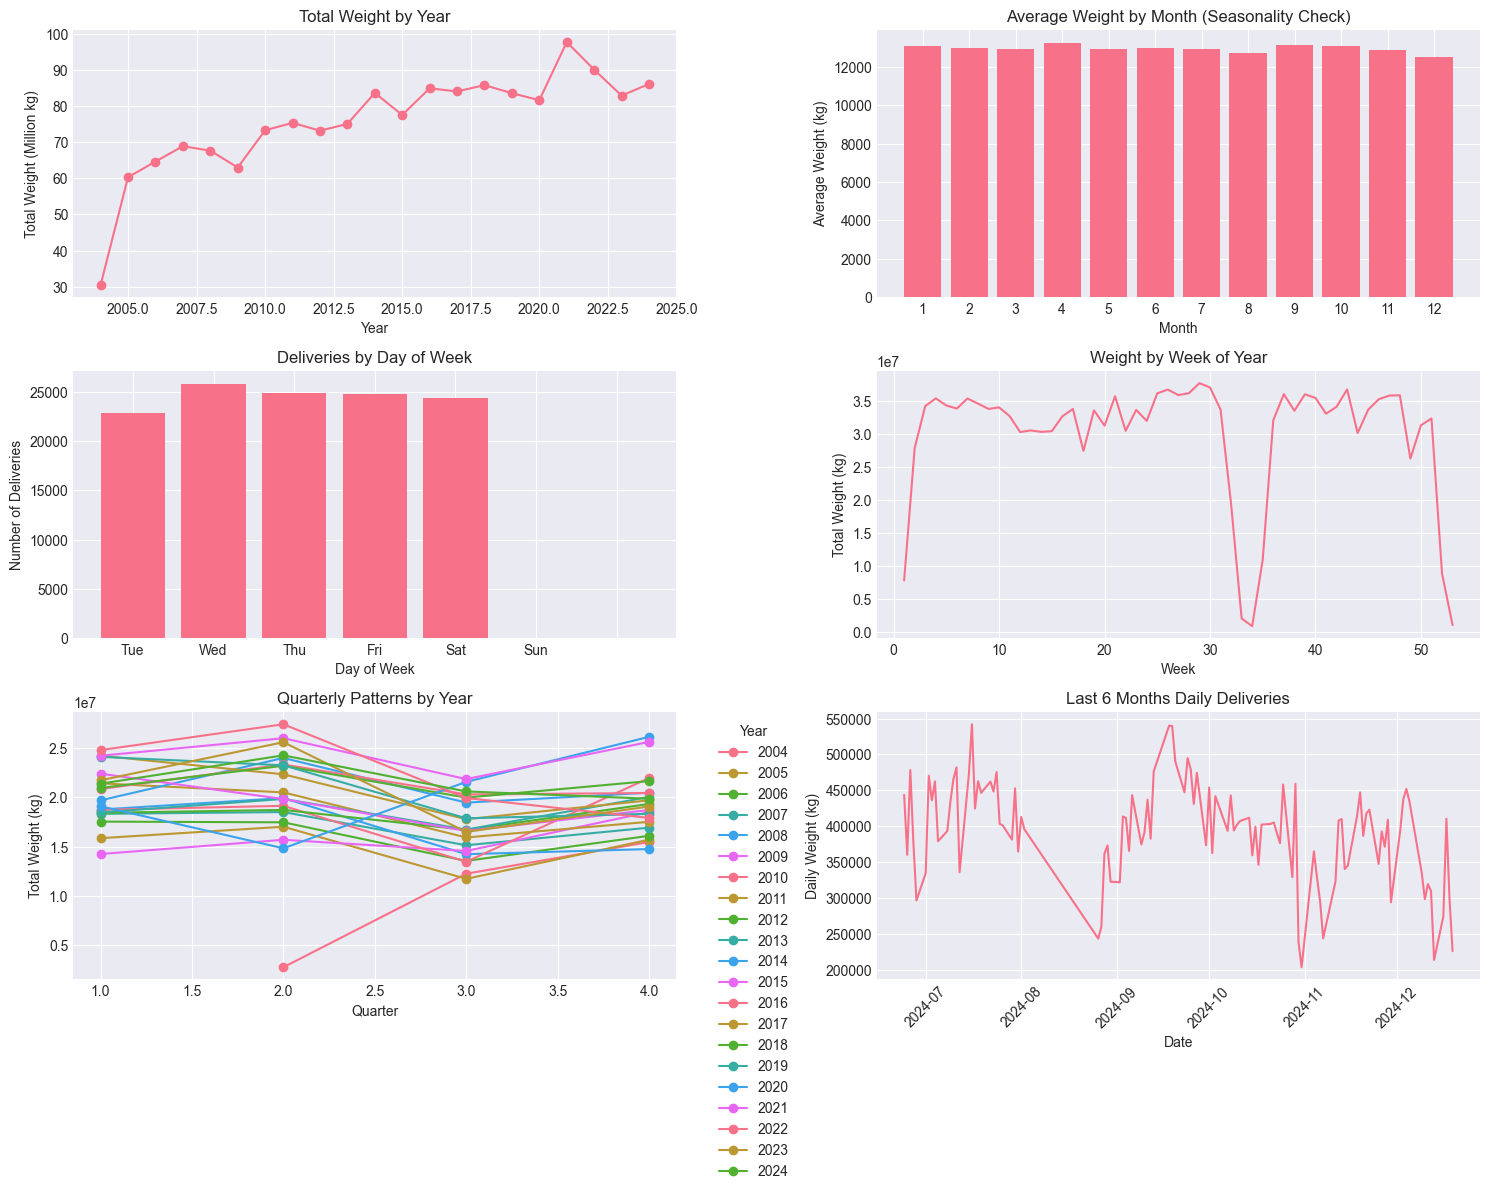


=== Material Analysis ===
Unique raw materials (rm_id): 203
Unique products: 54
Unique suppliers: 255

Top 10 Materials by Total Weight:
        net_weight_sum  net_weight_count  days_active
rm_id                                                
2130.0     351244347.0             23620         4782
1903.0     270574744.0             19337         2401
2160.0     161712550.0             13507         3881
2140.0     132512874.0              5343         4676
1909.0      66634224.0              2697         2399
1906.0      44043967.0              3112         2399
3126.0      38273200.0              2059         1552
2182.0      37282921.0              3370         1665
3781.0      26317536.0              1521          654
365.0       25616003.0              1722          288


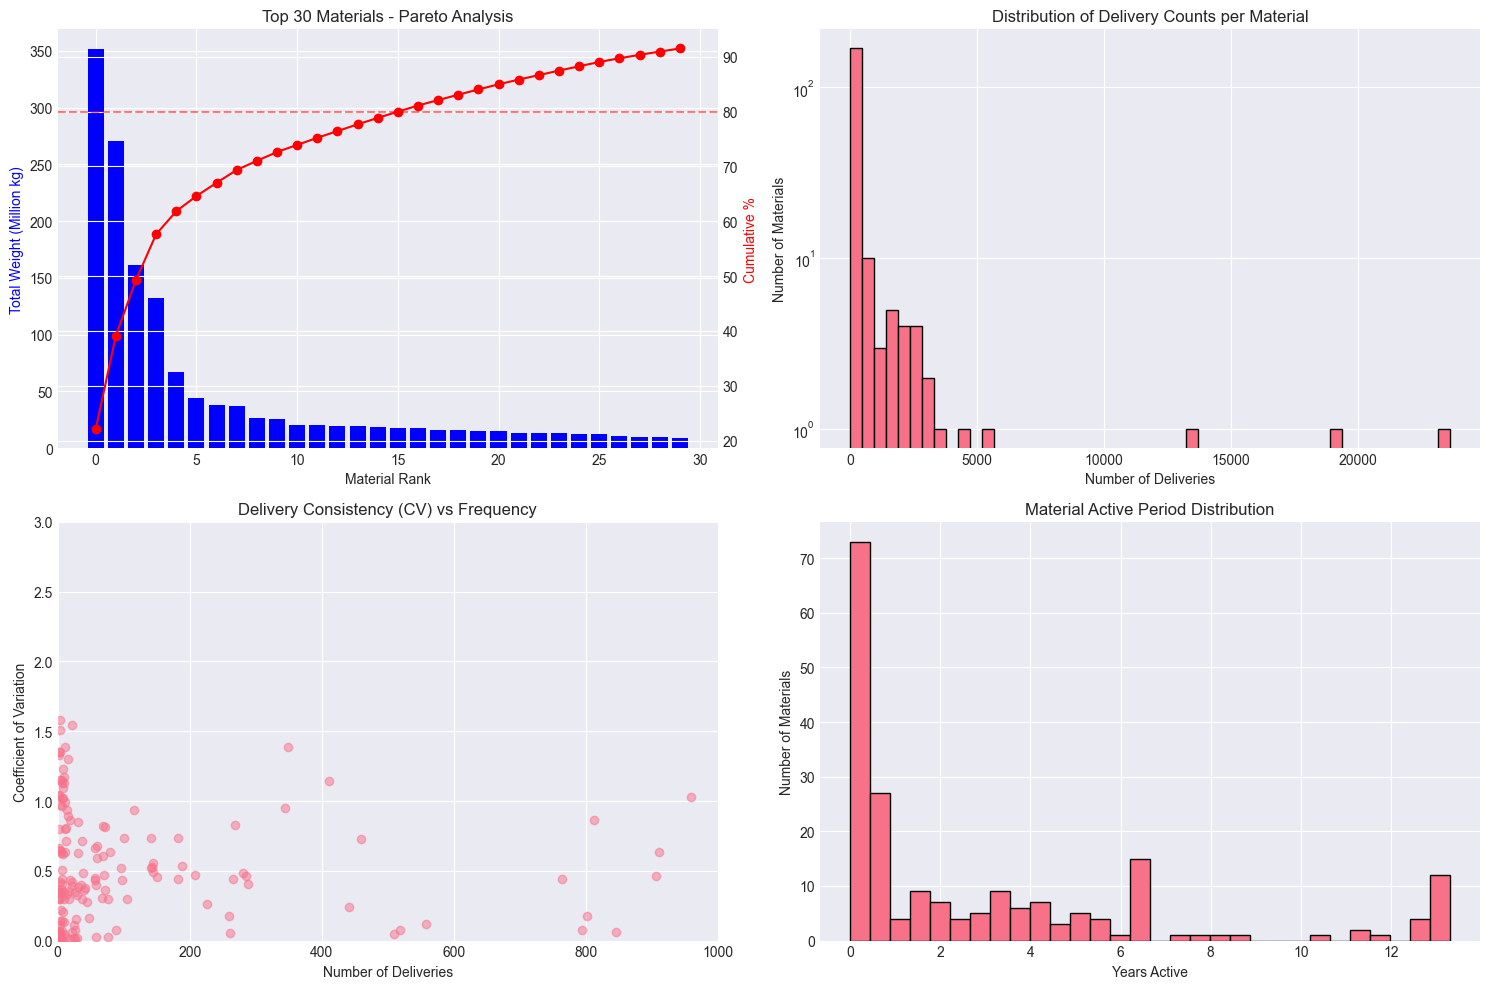


=== Purchase Order Analysis ===
Lead Time Statistics (days):
count    122537.000000
mean        -35.592686
std          97.425576
min        -723.000000
25%         -26.000000
50%         -15.000000
75%          -4.000000
max         794.000000
Name: lead_time, dtype: float64

Early deliveries: 108948 (88.9%)


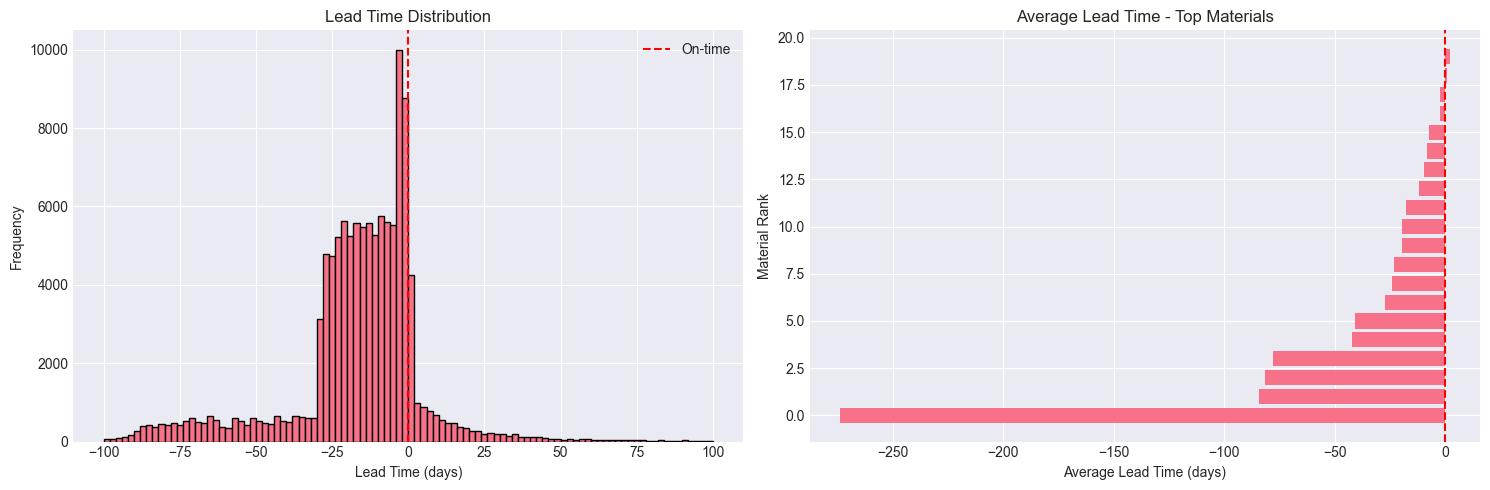


=== Outlier Analysis ===
Weight outliers detected: 0 (0.00%)
Outlier weight range: nan to nan

=== Statistical Tests ===
Monthly seasonality test (ANOVA): F=nan, p-value=nan
  → No significant monthly seasonality
Day-of-week test (ANOVA): F=nan, p-value=nan

KEY INSIGHTS FOR MODELING

1. DATA COVERAGE:
   - Historical data spans 20.5 years
   - 203 unique materials
   - 122,590 total deliveries

2. RECENT ACTIVITY (last 3 months):
   - Active materials: 43
   - Total deliveries: 1,589
   - Average daily weight: 375,999 kg

3. MATERIAL CONCENTRATION:
   - Top 10 materials: 72.6% of total weight
   - Top 20 materials: 84.0% of total weight

4. DELIVERY PATTERNS:
   - Materials with >100 deliveries: 59
   - Average deliveries per material: 603.5
   - Median lead time: -15 days
   - Early delivery rate: 88.9%

5. PREDICTION CHALLENGES:
   - Materials to predict: 203
   - Forecast horizon: 2025-01-01 00:00:00 to 2025-05-31 00:00:00
   - Total predictions needed: 30,450
   - Materials inact

In [25]:
# Exploratory Data Analysis - Raw Material Deliveries

## Setup
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from scipy import stats
from pathlib import Path
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Data Loading Functions
def load_data(filename, folder="1_raw"):
    """
    Load data from a CSV file in a subfolder of the project's 'data' directory.
    This version is adjusted to work even if the notebook is run from a subfolder.
    
    Parameters
    ----------
    filename : str
        The name of the file to load, including the extension (e.g., "data.csv").
    folder : str, optional
        The subfolder within 'data' to load from. Defaults to "1_raw".
    """
    try:
        # Go up one level from the current working directory to find the project root
        PROJECT_ROOT = Path.cwd().parent
        
        file_path = PROJECT_ROOT / "data" / folder / filename
        
        df = pd.read_csv(file_path, sep=",")
        
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return None

### Load all datasets
print("Loading datasets...")

# Extended files
df_em = load_data("extended_materials.csv")
df_et = load_data("extended_transportation.csv")

# Kernel files
df_kpo = load_data("kernel_purchase_orders.csv")
df_kr = load_data("kernel_receivals.csv")

# Other files
df_pm = load_data("prediction_mapping.csv")
df_ss = load_data("sample_submission.csv")

datasets = {
    "extended_materials": df_em,
    "extended_transportation": df_et,
    "kernel_purchase_orders": df_kpo,
    "kernel_receivals": df_kr,
    "prediction_mapping": df_pm,
    "sample_submission": df_ss,
}

# Create shorter aliases for easier use
receivals = df_kr
purchase_orders = df_kpo
prediction_mapping = df_pm
sample_submission = df_ss
materials = df_em
transportation = df_et

## 1. Basic Data Overview

def basic_overview(df, name):
    """Generate basic overview of a dataframe."""
    print(f"\n{'='*50}")
    print(f"Dataset: {name}")
    print(f"{'='*50}")
    print(f"Shape: {df.shape}")
    print(f"\nColumn Types:")
    print(df.dtypes)
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
    print(missing_df[missing_df['Missing Count'] > 0])
    print(f"\nFirst 5 rows:")
    print(df.head())
    
# Run basic overview for all datasets
basic_overview(receivals, "Receivals")
basic_overview(purchase_orders, "Purchase Orders")
basic_overview(materials, "Materials")

## 2. Temporal Analysis

# Convert date columns
receivals['date_arrival'] = pd.to_datetime(receivals['date_arrival'], utc=True).dt.tz_localize(None)
purchase_orders['delivery_date'] = pd.to_datetime(purchase_orders['delivery_date'], errors='coerce', utc=True)
if purchase_orders['delivery_date'].dtype.name == 'datetime64[ns, UTC]':
    purchase_orders['delivery_date'] = purchase_orders['delivery_date'].dt.tz_localize(None)
purchase_orders['created_date_time'] = pd.to_datetime(purchase_orders['created_date_time'], errors='coerce')
purchase_orders['modified_date_time'] = pd.to_datetime(purchase_orders['modified_date_time'], errors='coerce')
prediction_mapping['forecast_start_date'] = pd.to_datetime(prediction_mapping['forecast_start_date'])
prediction_mapping['forecast_end_date'] = pd.to_datetime(prediction_mapping['forecast_end_date'])

# Time range analysis
print("\n=== Temporal Coverage ===")
print(f"Receivals date range: {receivals['date_arrival'].min()} to {receivals['date_arrival'].max()}")
print(f"Days covered: {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days}")

# Create time-based features
receivals['year'] = receivals['date_arrival'].dt.year
receivals['month'] = receivals['date_arrival'].dt.month
receivals['day_of_week'] = receivals['date_arrival'].dt.dayofweek
receivals['week_of_year'] = receivals['date_arrival'].dt.isocalendar().week
receivals['quarter'] = receivals['date_arrival'].dt.quarter

# Visualize temporal patterns
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Yearly trend
yearly_weight = receivals.groupby('year')['net_weight'].agg(['sum', 'count', 'mean'])
axes[0, 0].plot(yearly_weight.index, yearly_weight['sum']/1e6, marker='o')
axes[0, 0].set_title('Total Weight by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Weight (Million kg)')
axes[0, 0].grid(True)

# 2. Monthly seasonality
monthly_weight = receivals.groupby('month')['net_weight'].mean()
axes[0, 1].bar(monthly_weight.index, monthly_weight.values)
axes[0, 1].set_title('Average Weight by Month (Seasonality Check)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Weight (kg)')
axes[0, 1].set_xticks(range(1, 13))

# 3. Day of week pattern
dow_weight = receivals.groupby('day_of_week')['net_weight'].agg(['sum', 'count'])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1, 0].bar(range(7), dow_weight['count'].values)
axes[1, 0].set_title('Deliveries by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Number of Deliveries')
axes[1, 0].set_xticklabels(days)

# 4. Weekly pattern over the year
weekly_weight = receivals.groupby('week_of_year')['net_weight'].sum()
axes[1, 1].plot(weekly_weight.index, weekly_weight.values)
axes[1, 1].set_title('Weight by Week of Year')
axes[1, 1].set_xlabel('Week')
axes[1, 1].set_ylabel('Total Weight (kg)')

# 5. Quarterly trend
quarterly_weight = receivals.groupby(['year', 'quarter'])['net_weight'].sum().reset_index()
pivot_quarterly = quarterly_weight.pivot(index='quarter', columns='year', values='net_weight')
pivot_quarterly.plot(ax=axes[2, 0], marker='o')
axes[2, 0].set_title('Quarterly Patterns by Year')
axes[2, 0].set_xlabel('Quarter')
axes[2, 0].set_ylabel('Total Weight (kg)')
axes[2, 0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Recent activity
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=180)
recent_daily = receivals[receivals['date_arrival'] > recent_cutoff].groupby(
    receivals['date_arrival'].dt.date)['net_weight'].sum()
axes[2, 1].plot(recent_daily.index, recent_daily.values)
axes[2, 1].set_title('Last 6 Months Daily Deliveries')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Daily Weight (kg)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Material Analysis

# Analyze material characteristics
print("\n=== Material Analysis ===")
print(f"Unique raw materials (rm_id): {receivals['rm_id'].nunique()}")
print(f"Unique products: {receivals['product_id'].nunique()}")
print(f"Unique suppliers: {receivals['supplier_id'].nunique()}")

# Material frequency and volume
material_stats = receivals.groupby('rm_id').agg({
    'net_weight': ['sum', 'mean', 'std', 'count'],
    'date_arrival': ['min', 'max']
}).round(2)
material_stats.columns = ['_'.join(col).strip() for col in material_stats.columns]
material_stats['days_active'] = (
    material_stats['date_arrival_max'] - material_stats['date_arrival_min']
).dt.days
material_stats = material_stats.sort_values('net_weight_sum', ascending=False)

print("\nTop 10 Materials by Total Weight:")
print(material_stats.head(10)[['net_weight_sum', 'net_weight_count', 'days_active']])

# Visualize material distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Pareto chart of materials
top_30_materials = material_stats.head(30)
cumulative_pct = 100 * top_30_materials['net_weight_sum'].cumsum() / material_stats['net_weight_sum'].sum()
ax1 = axes[0, 0]
ax1.bar(range(len(top_30_materials)), top_30_materials['net_weight_sum'].values/1e6, color='b')
ax1.set_ylabel('Total Weight (Million kg)', color='b')
ax1.set_xlabel('Material Rank')
ax1.set_title('Top 30 Materials - Pareto Analysis')
ax2 = ax1.twinx()
ax2.plot(range(len(top_30_materials)), cumulative_pct.values, 'r-', marker='o')
ax2.set_ylabel('Cumulative %', color='r')
ax2.axhline(y=80, color='r', linestyle='--', alpha=0.5)

# 2. Delivery frequency distribution
axes[0, 1].hist(material_stats['net_weight_count'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of Delivery Counts per Material')
axes[0, 1].set_xlabel('Number of Deliveries')
axes[0, 1].set_ylabel('Number of Materials')
axes[0, 1].set_yscale('log')

# 3. Weight variability (CV)
material_stats['cv'] = material_stats['net_weight_std'] / material_stats['net_weight_mean']
axes[1, 0].scatter(material_stats['net_weight_count'], material_stats['cv'], alpha=0.5)
axes[1, 0].set_title('Delivery Consistency (CV) vs Frequency')
axes[1, 0].set_xlabel('Number of Deliveries')
axes[1, 0].set_ylabel('Coefficient of Variation')
axes[1, 0].set_xlim(0, 1000)
axes[1, 0].set_ylim(0, 3)

# 4. Active period distribution
axes[1, 1].hist(material_stats['days_active']/365, bins=30, edgecolor='black')
axes[1, 1].set_title('Material Active Period Distribution')
axes[1, 1].set_xlabel('Years Active')
axes[1, 1].set_ylabel('Number of Materials')

plt.tight_layout()
plt.show()

## 4. Purchase Order Analysis

# Merge purchase orders with receivals
po_receival = pd.merge(
    receivals,
    purchase_orders,
    on=['purchase_order_id', 'purchase_order_item_no'],
    how='left',
    suffixes=('', '_po')
)

# Calculate lead times
po_receival['lead_time'] = (po_receival['date_arrival'] - po_receival['delivery_date']).dt.days

print("\n=== Purchase Order Analysis ===")
print(f"Lead Time Statistics (days):")
print(po_receival['lead_time'].describe())

# Negative lead time means early delivery
early_deliveries = (po_receival['lead_time'] < 0).sum()
print(f"\nEarly deliveries: {early_deliveries} ({100*early_deliveries/len(po_receival):.1f}%)")

# Visualize lead time distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Lead time histogram
axes[0].hist(po_receival['lead_time'].dropna(), bins=100, range=(-100, 100), edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--', label='On-time')
axes[0].set_title('Lead Time Distribution')
axes[0].set_xlabel('Lead Time (days)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# 2. Lead time by material
lead_by_material = po_receival.groupby('rm_id')['lead_time'].mean().sort_values()
top_materials = material_stats.head(20).index
lead_top = lead_by_material[lead_by_material.index.isin(top_materials)]
axes[1].barh(range(len(lead_top)), lead_top.values)
axes[1].set_title('Average Lead Time - Top Materials')
axes[1].set_xlabel('Average Lead Time (days)')
axes[1].set_ylabel('Material Rank')
axes[1].axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

## 5. Statistical Tests and Outlier Detection

# Outlier detection for net_weight
Q1 = receivals['net_weight'].quantile(0.25)
Q3 = receivals['net_weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = receivals[(receivals['net_weight'] < lower_bound) | (receivals['net_weight'] > upper_bound)]
print(f"\n=== Outlier Analysis ===")
print(f"Weight outliers detected: {len(outliers)} ({100*len(outliers)/len(receivals):.2f}%)")
print(f"Outlier weight range: {outliers['net_weight'].min():.2f} to {outliers['net_weight'].max():.2f}")

# Test for seasonality
print("\n=== Statistical Tests ===")
# ANOVA test for monthly differences
monthly_groups = [group['net_weight'].values for name, group in receivals.groupby('month')]
f_stat, p_value = stats.f_oneway(*monthly_groups)
print(f"Monthly seasonality test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant monthly seasonality detected")
else:
    print("  → No significant monthly seasonality")

# Test for weekly patterns
weekly_groups = [group['net_weight'].values for name, group in receivals.groupby('day_of_week')]
f_stat, p_value = stats.f_oneway(*weekly_groups)
print(f"Day-of-week test (ANOVA): F={f_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("  → Significant day-of-week patterns detected")

## 6. Key Insights Summary

print("\n" + "="*60)
print("KEY INSIGHTS FOR MODELING")
print("="*60)

# Calculate key metrics
recent_months = 3
recent_cutoff = receivals['date_arrival'].max() - timedelta(days=recent_months*30)
recent_activity = receivals[receivals['date_arrival'] > recent_cutoff]

print(f"\n1. DATA COVERAGE:")
print(f"   - Historical data spans {(receivals['date_arrival'].max() - receivals['date_arrival'].min()).days/365:.1f} years")
print(f"   - {receivals['rm_id'].nunique()} unique materials")
print(f"   - {len(receivals):,} total deliveries")

print(f"\n2. RECENT ACTIVITY (last {recent_months} months):")
print(f"   - Active materials: {recent_activity['rm_id'].nunique()}")
print(f"   - Total deliveries: {len(recent_activity):,}")
print(f"   - Average daily weight: {recent_activity.groupby(recent_activity['date_arrival'].dt.date)['net_weight'].sum().mean():,.0f} kg")

print(f"\n3. MATERIAL CONCENTRATION:")
top_10_pct = 100 * material_stats.head(10)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
top_20_pct = 100 * material_stats.head(20)['net_weight_sum'].sum() / material_stats['net_weight_sum'].sum()
print(f"   - Top 10 materials: {top_10_pct:.1f}% of total weight")
print(f"   - Top 20 materials: {top_20_pct:.1f}% of total weight")

print(f"\n4. DELIVERY PATTERNS:")
print(f"   - Materials with >100 deliveries: {(material_stats['net_weight_count'] > 100).sum()}")
print(f"   - Average deliveries per material: {material_stats['net_weight_count'].mean():.1f}")
print(f"   - Median lead time: {po_receival['lead_time'].median():.0f} days")
print(f"   - Early delivery rate: {100*(po_receival['lead_time'] < 0).sum()/len(po_receival):.1f}%")

print(f"\n5. PREDICTION CHALLENGES:")
print(f"   - Materials to predict: {prediction_mapping['rm_id'].nunique()}")
print(f"   - Forecast horizon: {prediction_mapping['forecast_start_date'].min()} to {prediction_mapping['forecast_end_date'].max()}")
print(f"   - Total predictions needed: {len(prediction_mapping):,}")

# Materials not seen recently
inactive_materials = set(material_stats.index) - set(recent_activity['rm_id'].unique())
print(f"   - Materials inactive in last {recent_months} months: {len(inactive_materials)}")

print("\n" + "="*60)